<a href="https://colab.research.google.com/github/mahir-mav/Mahir-Labib-Parash/blob/main/deploy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
encode=preprocessing.LabelEncoder()
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [3]:
import pandas as pd
df=pd.read_csv('/content/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
cat_cols=df.select_dtypes(include=object)
cat_cols=list(cat_cols)
cat_cols

['sex', 'smoker', 'region']

In [6]:
num_cols=df.select_dtypes(exclude=object)
num_cols=list(num_cols)
num_cols

['age', 'bmi', 'children', 'charges']

In [14]:
for i in cat_cols:
  df[i]=encode.fit_transform(df[i])

In [29]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [27]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


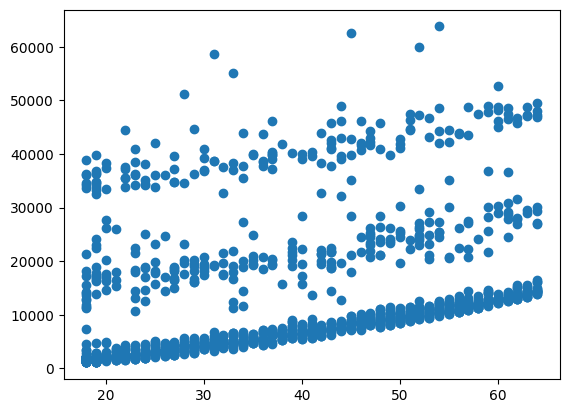

In [28]:
plt.scatter(df['age'],df['charges'])
plt.show()

<Axes: xlabel='age', ylabel='charges'>

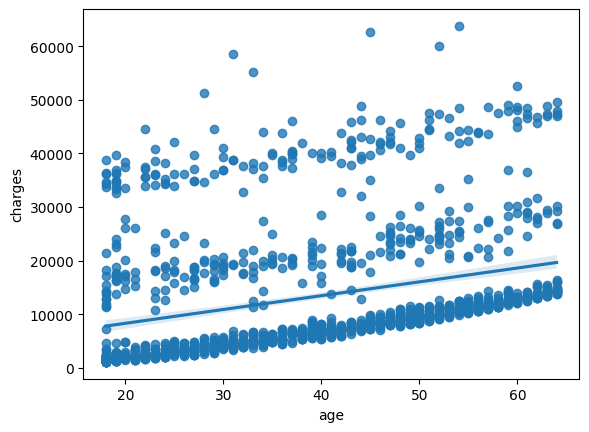

In [31]:
import seaborn as sns
sns.regplot(x='age',y='charges',data=df)

In [17]:
x_set=df.drop(['charges'],axis=1)
y_set=df['charges']
x_set

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [32]:
y_set

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [33]:
xtrain, xtest, ytrain, ytest = train_test_split(x_set, y_set, test_size=0.5, random_state=42)

Standradizing Dataset to come to global minimum

In [35]:
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

In [36]:
regrassion=LinearRegression()
regrassion.fit(xtrain,ytrain)

LinearRegression()

In [37]:
print(regrassion.coef_)

[3533.36901183   49.88507735 2002.93806001  531.17533366 9153.90943511
 -523.90975279]


In [38]:
print(regrassion.intercept_)

12893.485315754857


In [39]:
regrassion.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [40]:
reg_pred=regrassion.predict(xtest)
reg_pred

array([ 9205.5863089 ,  7247.84481384, 36387.0112689 ,  9708.83570065,
       27055.88151466, 10639.60572867,   550.86797004, 16886.59123616,
        1504.00796447, 11430.5908063 , 27638.24589038,  9649.78973642,
        5343.31926691, 38040.63909141, 39703.16286342, 36712.37632895,
       15080.62493758, 35403.97842147,  9026.74957122, 31203.07952736,
        3843.63230805,  9868.61050506,  2333.14137857,  7524.26662598,
       11387.76513542, 13049.7361161 , 13920.29122491,  6469.75923087,
       10174.0651075 ,  2471.94461194,  8806.80385091, 13033.15317272,
        4688.64172424,  3728.66680787,  4366.84751777, 13301.6773103 ,
        1833.38538938,  8430.27526752, 32945.87188148, 32311.91988543,
        3828.64920902,  4773.7790386 , 13605.09445241, 11505.98825436,
        8921.84741277, 11680.09436581,  5625.78555867,  2999.13430969,
       35174.4359633 ,  9307.71540058, 15532.94208422,  2654.39962671,
       12472.42644164,  2078.82048264, 13281.70315588, 12850.17919564,
      

In [44]:
diff = pd.DataFrame({'Actual value': ytest,'Predicted value':reg_pred})
diff

,Actual value,Predicted value
764,9095.06825,9205.586309
887,5272.17580,7247.844814
890,29330.98315,36387.011269
1293,9301.89355,9708.835701
259,33750.29180,27055.881515
...,...,...
1166,10982.50130,15507.602537
557,3935.17990,7777.619541
460,10381.47870,13503.928407
1234,8515.75870,9145.595646


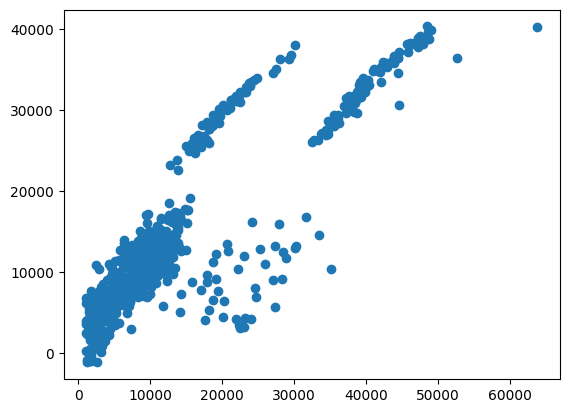

In [45]:
plt.scatter(ytest,reg_pred)
plt.show()

In [47]:
print('Mean Absolute Error:',mean_absolute_error(ytest,reg_pred))
print('Mean Squared Error:',mean_squared_error(ytest,reg_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(ytest,reg_pred)))

Mean Absolute Error: 4282.063286227198
Mean Squared Error: 35238625.04205498
Root Mean Squared Error: 5936.213021957263


In [48]:
R2_Score=(r2_score(ytest,reg_pred))
print(R2_Score)

0.7744249495380056


In [49]:
Adjusted_R2_Score=1-(1-R2_Score)*(len(ytest)-1)/(len(ytest)-x_set.shape[1]-1)
print(Adjusted_R2_Score)

0.7723804626758123


In [56]:
select_data=df.iloc[0]

In [63]:
data_array=select_data.to_numpy()
reshaped_data = data_array.reshape(1,-1)
print(reshaped_data.shape)

(1, 7)
